<a href="https://colab.research.google.com/github/symgkhn/PythonDeepLearning/blob/main/GradientDescent_Algoritmas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

Temel olarak, örneğin bir regresyon doğrusundaki eğimin seviyesini ölçen fonksiyon denilebilir. Ve teknik olarak, fonksiyondaki tüm değişkenlerin birinci dereceden türevlerinin toplamı bize gradyanı verir. Fonksiyon çıktılarının döngüsel (iterative) olarak parametrelerinin optimize edilerek yukarıdan aşağıya doğru inecek şekilde hatayı minimize etme sürecinden dolayı Azaltma/İniş (descent/descending) olarak tanımlanır.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

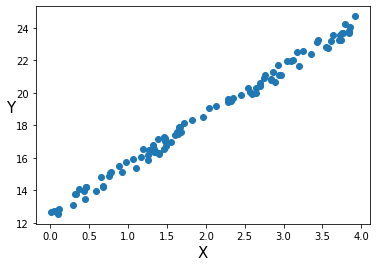

In [2]:
# Sentetik veri seti
x = 4 * np.random.rand(100,1)
y = 12 + (3 * x) + np.random.rand(100,1)

# Scatterplot
plt.scatter(x,y)
plt.xlabel("X",fontsize = 15)
plt.ylabel("Y",fontsize = 15, rotation = 0)
plt.show()

## Doğrusal Regresyon
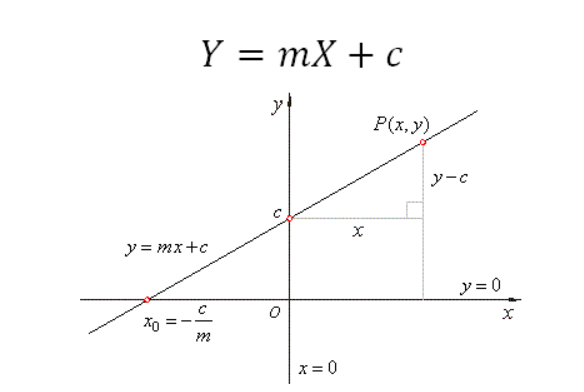

M (Theta 0) değeri: 2.964726347703391
C (Theta 1) değeri: 12.606253327423536


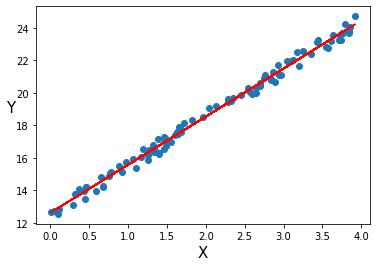

In [3]:
# Regresyon katsayılarını hesaplayan
# analitik fonksiyon
def analyticsMethod(x, y):
    ssxy = (x * y).sum() - (len(x) * x.mean() * y.mean())
    ssxx = ((x - x.mean()) ** 2).sum()
    m = ssxy / ssxx
    c = y.mean() - (m * x.mean())
    return [m,c]

m, c = analyticsMethod(x, y)
# printing both the values
print(f'M (Theta 0) değeri: {m}')
print(f'C (Theta 1) değeri: {c}')

# M ve C ile doğruyu çizdirelim
# Scatter plot üzerinde regresyon doğrusu
plt.scatter(x, y)
plt.plot(x, (x * m + c), color = "red")
plt.xlabel("X", fontsize = 15)
plt.ylabel("Y", fontsize = 15, rotation = 0)
plt.show()

## Gradient Descent Uygulaması

In [4]:
import numpy as np

# Sentetik veri seti
x = 4 * np.random.rand(100,1)
y = 9 + (3 * x) + np.random.rand(100,1)

# maliyet (cost) fonksiyonu
def costFunction(theta, X, y):
    """
    Bu fonksiyonda cost hesaplanır
    x ve y tanımlanan değişkenlerdir
    theta = katsayıların vektörüdür
    """
    m = len(y)
    # Cost hesaplama
    c = (1 / 2 * m) * np.sum(np.square((X.dot(theta)) - y))
    return c


def gradient_descent_1(X, y, theta, alpha, iterations):
    """
    Fonksiyon thate ve cost fonksiyonundan çıkan
    tüm değerleri döndürür
    theta = regresyon katsayılarının matrisi
    alpha = learning rate / öğrenme hızı
    iteration = iterasyon sayısı
    """
    # Bir değişkendeki değer sayısı
    m = len(y)

    # Katsayılar ve cost fonksiyondan çıkanlar
    # bir matrise yerleştirilir
    thetas = np.zeros((iterations, 2))
    costs = np.zeros(iterations)

    # Her bir iterasyonda katsayılar hesaplanır
    for i in range(iterations):
        print(i)
        theta = theta - (1 / m) * alpha * (X.T.dot((X.dot(theta)) - y))
        thetas[i, :] = theta.T
        costs[i] = costFunction(theta, X, y)
    return theta, thetas, costs

# Learning Rate
alpha = 0.01

# İterasyon sayısı
iterations = 3000

# Rasgele katsayı başlangıç değeri
theta = np.random.randn(2, 1)

# Her bir özellik için sabit hata payı eklenir
X_bias = np.c_[np.ones((len(x), 1)), x]

# Gradient Decent fonksiyonun çalıştırılması
theta, thetas, costs = gradient_descent_1(X_bias, y, theta, alpha, iterations)

# Sonuçlar
print(f"Theta 0 (m) değeri: {theta[0][0]}")
print(f"Theta 1 değeri: {theta[1][0]}")
print(f"Maliyet/Cost/MSE(L2 Loss) değeri: {costs[-1]}")



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27